In [1]:
#make the necessary importations 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
import numpy as np
import statsmodels.tsa.arima_model as ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [3]:
#load the data from the stocks file
Fdataset = pd.read_csv("stocks_final.csv")
Fdataset.head()#displays the first five rows of the dataset

,Date,icln_Open,icln_High,icln_Low,icln_Close,icln_Adj_Close,icln_Volume,icln_pctChange,xlu_Open,xlu_High,...,ryu_Adj_Close,ryu_Volume,ryu_pctChange,futy_Open,futy_High,futy_Low,futy_Close,futy_Adj_Close,futy_Volume,futy_pctChange
0,2013-10-24,10.99,11.18,10.85,10.90,9.143383,41600,-0.004566,39.009998,39.009998,...,50.859299,7100,-0.001546,25.250000,25.290001,25.170000,25.240000,19.790556,15500,NaN
1,2013-10-25,10.84,10.84,10.67,10.73,9.000779,17200,-0.015596,38.759998,39.230000,...,51.458099,5400,0.011774,25.240000,25.510000,25.200001,25.500000,19.994419,14900,0.010301
2,2013-10-28,10.75,10.75,10.54,10.62,8.908505,57200,-0.010252,39.180000,39.349998,...,51.402939,2900,-0.001072,25.530001,25.600000,25.410000,25.480000,19.978731,39500,-0.000785
3,2013-10-29,10.58,10.70,10.58,10.70,8.975615,22900,0.007533,39.110001,39.270000,...,51.505379,5700,0.001993,25.709999,25.709999,25.440001,25.530001,20.017941,15600,0.001963
4,2013-10-30,10.65,10.68,10.60,10.62,8.908505,17100,-0.007477,39.240002,39.450001,...,51.166584,2800,-0.006578,25.590000,25.690001,25.360001,25.389999,19.908169,163500,-0.005484


In [35]:
#information on the rows and columns of the dataset
Fdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1928 non-null   object 
 1   icln_Open       1928 non-null   float64
 2   icln_High       1928 non-null   float64
 3   icln_Low        1928 non-null   float64
 4   icln_Close      1928 non-null   float64
 5   icln_Adj_Close  1928 non-null   float64
 6   icln_Volume     1928 non-null   int64  
 7   icln_pctChange  1928 non-null   float64
 8   xlu_Open        1928 non-null   float64
 9   xlu_High        1928 non-null   float64
 10  xlu_Low         1928 non-null   float64
 11  xlu_Close       1928 non-null   float64
 12  xlu_Adj_Close   1928 non-null   float64
 13  xlu_Volume      1928 non-null   int64  
 14  xlu_pctChange   1928 non-null   float64
 15  vpu_Open        1928 non-null   float64
 16  vpu_High        1928 non-null   float64
 17  vpu_Low         1928 non-null   f

In [36]:
#statistics of the dataset
Fdataset.describe()

,icln_Open,icln_High,icln_Low,icln_Close,icln_Adj_Close,icln_Volume,icln_pctChange,xlu_Open,xlu_High,xlu_Low,...,ryu_Adj_Close,ryu_Volume,ryu_pctChange,futy_Open,futy_High,futy_Low,futy_Close,futy_Adj_Close,futy_Volume,futy_pctChange
count,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1.928000e+03,1928.000000,1928.000000,1928.000000,1928.000000,...,1928.000000,1.928000e+03,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1.928000e+03,1927.000000
mean,11.485581,11.565871,11.368428,11.470871,10.752388,8.066128e+05,0.000605,51.945342,52.310306,51.578548,...,77.263629,2.854777e+04,0.000442,33.773802,33.972982,33.541006,33.766909,30.416832,1.390541e+05,0.000456
std,4.613882,4.673090,4.513397,4.599091,4.787959,2.168355e+06,0.016163,7.821452,7.879897,7.749411,...,15.670826,5.858240e+04,0.011926,5.146480,5.189534,5.105807,5.151132,6.629521,2.062714e+05,0.011948
min,7.770000,7.830000,7.650000,7.760000,6.908467,3.600000e+03,-0.128111,37.279999,37.439999,37.110001,...,49.133766,2.000000e+02,-0.120529,24.490000,24.500000,24.360001,24.400000,19.131914,3.200000e+03,-0.111678
25%,9.040000,9.090000,8.970000,9.030000,8.352595,2.980000e+04,-0.007081,45.097499,45.482501,44.817500,...,62.655824,7.200000e+03,-0.004638,29.070000,29.267500,28.799999,29.095000,24.038598,4.480000e+04,-0.004818
50%,9.990000,10.050000,9.915000,9.990000,9.071732,6.220000e+04,0.000828,51.505001,51.789999,51.215000,...,75.630093,1.350000e+04,0.001039,33.465000,33.615000,33.285000,33.450001,29.802039,8.850000e+04,0.001053
75%,11.362500,11.412500,11.260000,11.340000,10.490922,2.726500e+05,0.008555,58.160000,58.545001,57.725001,...,91.016109,2.922500e+04,0.005990,38.002500,38.222501,37.709999,37.992501,36.151134,1.564250e+05,0.006189
max,34.150002,34.250000,32.630001,33.410000,33.224804,2.298940e+07,0.114046,70.699997,71.099998,70.459999,...,111.198311,1.072600e+06,0.123977,46.080002,46.279999,45.889999,46.209999,44.333183,3.419400e+06,0.124811


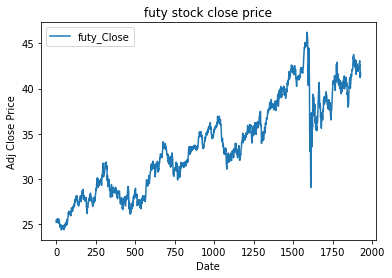

In [6]:
#data analysis/visualization
Fdataset[['futy_Close']].plot()
plt.title("futy stock close price")
plt.xlabel("Date")
plt.ylabel('Adj Close Price')
plt.show()

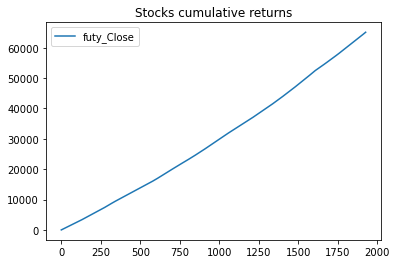

In [7]:
#cumulative return of stocks
Creturns = Fdataset[['futy_Close']].cumsum()
Creturns.plot()
plt.title("Stocks cumulative returns")
plt.show()

Text(0.5, 1.0, 'Autocorrection plot')

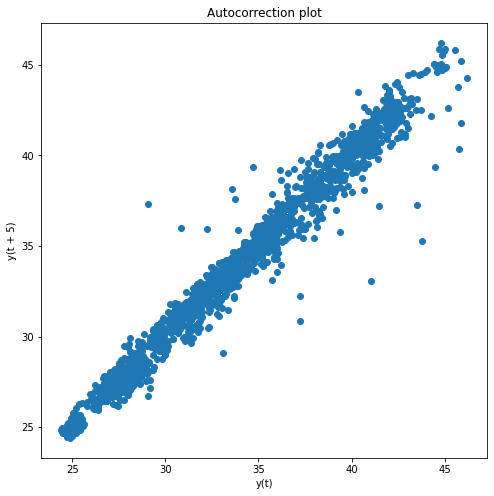

In [8]:
#autocorrection figure
plt.figure(figsize=(8,8))
lag_plot(Fdataset['futy_Close'], lag = 5)
plt.title("Autocorrection plot")

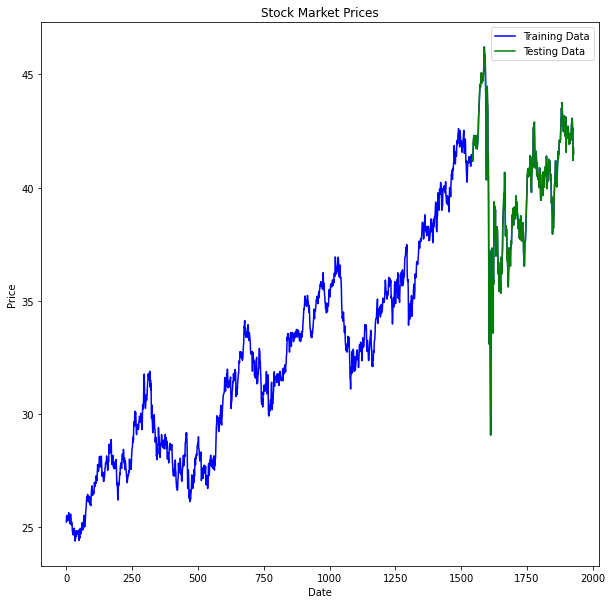

In [40]:
#train and test set
train_data, test_data = Fdataset[0:int(len(Fdataset)*0.8)], Fdataset[int(len(Fdataset)*0.8):]
plt.figure(figsize= (10,10))
plt.title("Stock Market Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(Fdataset['futy_Close'], 'blue', label = 'Training Data')
plt.plot(test_data['futy_Close'], 'green', label = 'Testing Data')
plt.legend()

In [41]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [43]:
import warnings
warnings.filterwarnings('ignore')
train_ar = train_data['futy_Close'].values
test_ar = test_data['futy_Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.588
Symmetric mean absolute percentage error: 7.414
